# Data Related

1. Traing data: practice test
2. Validation data: mock exam
3. Test data: entrance exam

# Overfitting vs. underfitting

## Overfitting: low bias, high variance

- overparameterized model or
- too fewer sample
- extract too much information from test data, however, perform poorly on test data(high variance)

## Underfitting: high bias, low variance (bad way)

- underparameterized model
- extract too little information from test data, however, perform consistently badly on test data(low variance)

## Example of Under- and Over-fitting

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [30]:
def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

def PolynomialRegression(degree=2, **kwargs):
    return make_pipe line(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

Text(0.5,1,'High-variance model: Overfits the data')

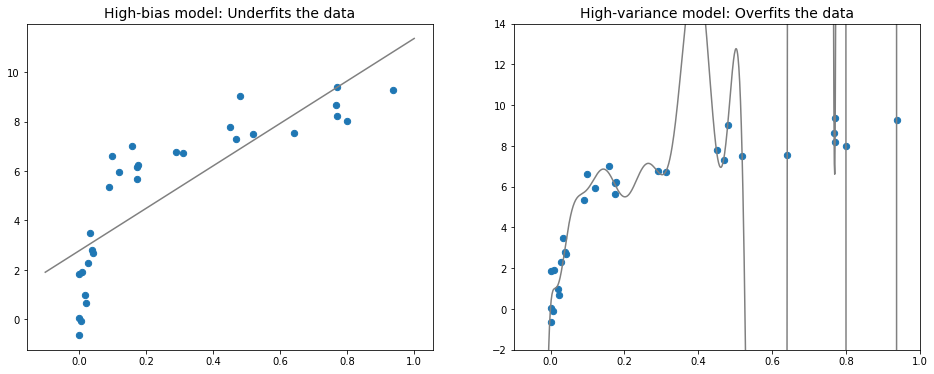

In [11]:
X, y = make_data(N=30)
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X,y)
model2 = PolynomialRegression(20).fit(X,y)

fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].scatter(X, y, s=40)
ax[0].plot(xfit, model1.predict(xfit), color='grey')
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X, y, s=40)
ax[1].plot(xfit, model2.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

## Trade-off b/w bias and variance

\begin{align*}
MSE &\equiv E \big( y - \hat{y}  \big)^2 \\
& = E \Big( \big(y - E(\hat{y})\big) + \big( E(\hat{y}) - \hat{y} \big)     \Big)^2  \\
& = E \big( y - E(\hat{y}) \big)^2  + E(\hat{y}^2) - \big(E(\hat{y})\big)^2 \\
& = \text{bias}^2 + var(\hat{y})  
\end{align*}

- **bias**: measurement of the errors of estimation
- **variance**: how much estimator $\hat{y}$ moves around its mean

# Validation Issues

## Wrong way of using test set: 100% accuracy ratio

In [12]:
# Irish data

from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

# model class

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
y_hat = model.predict(X)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_hat, y)

1.0

## Data holdout: train_test_split

In [15]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y)   # save 25% for validation

# fit model on data

model.fit(X1, y1)
y_hat = model.predict(X2)

accuracy_score(y2, y_hat)

0.8947368421052632

In [16]:
?train_test_split

## Cross validation: why lose information holding out data?

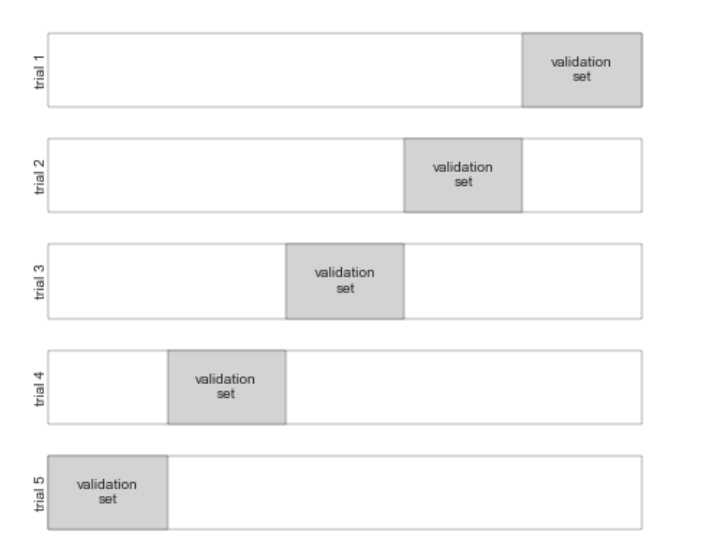

In [17]:
from IPython.display import Image
Image("c:/python/images/CrossValidationVisualization.PNG", width=500, height=160)

### CV's simple example 

In [18]:
# import data 
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

# model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

# cross validation score
from sklearn.cross_validation import cross_val_score

cross_val_score(model, X, y, cv=5)   # 5-folds validation set

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

## Selecting the best model
-  use more complicated or more flexible model 
-  use less complicated or less flexible model 
-  add more data
-  add more features

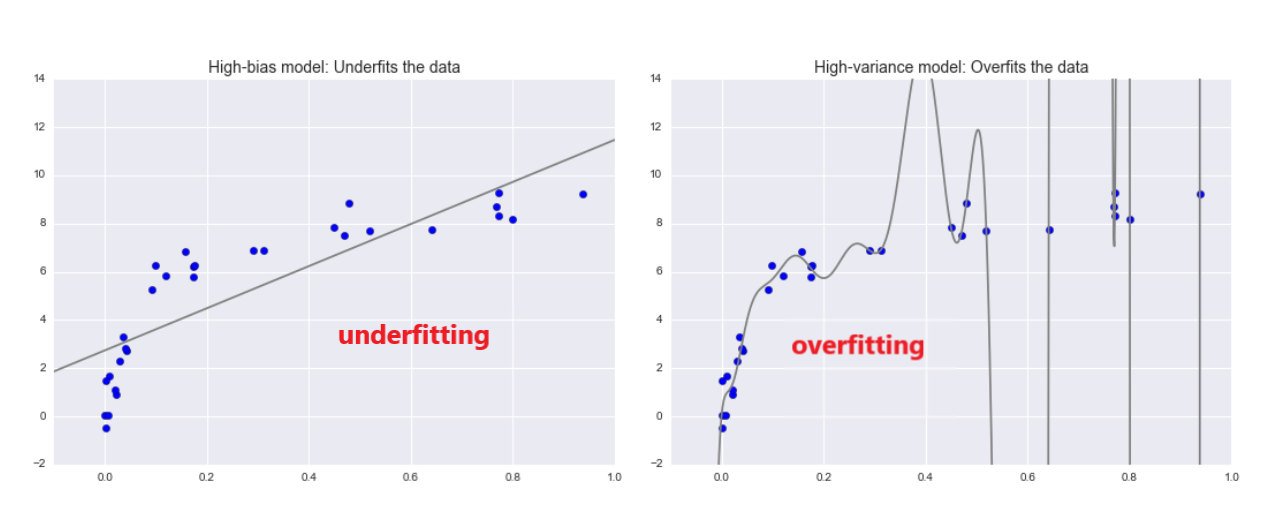

In [19]:
from IPython.display import Image
Image("c:/python/images/HyperParameterUnderOverFitting.png")

### Bias-Variance Tradeoff Metrics

Text(0.02,0.91,'validation score: $R^2$ = -1.7e+09')

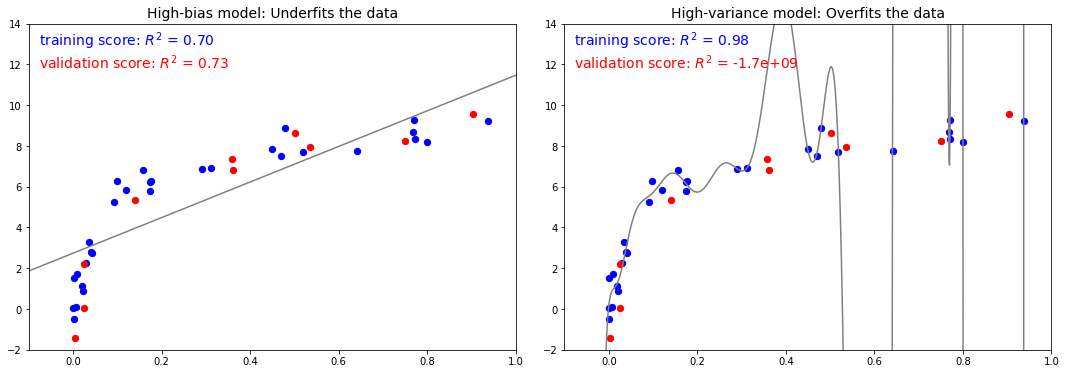

In [31]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')


$R^2 = goodness~~ of~~ fittness = 1-FVU$, FVU=Fraction of variance unexplained

$R^2 = 1- \frac{\sum (y_i - \hat{y})}{\sum (y_i - \bar{y})^2}$

-  score: various ways of measuring model performance(or prediction): $accuracy$ (for classifiers) or $R^2$ (regression)  <br>
    -  for individual: 
             y2_model = model.fit(X1, y1).predict(X2)
             y1_model = model.fit(X2, y2).predict(X1)
             accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

    -  iteration: accessing thru ```cross_val_score()``` 

### validation curve: caveats

**Which poly degree provide suitable trade-off between bias(underfitting) and variance(overfitting)?**
  

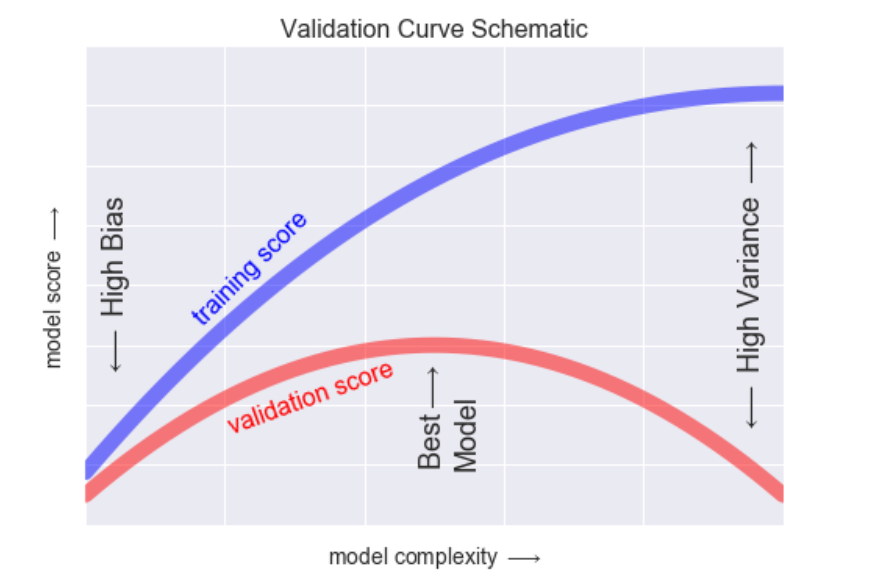

In [20]:
from IPython.display import Image
Image("c:/python/images/ValidationCurve.PNG", width=500, height=360)

-  The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
-  For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
-  For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
-  For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

### Validation curve: using polynomials

 \begin{align}
          y &= ax + b \\
          y &= ax^3 + bx^2 + cx + d
 \end{align}


In [26]:
X, y = make_data(40)
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

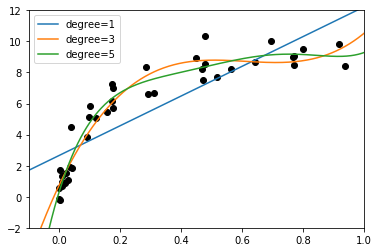

In [27]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

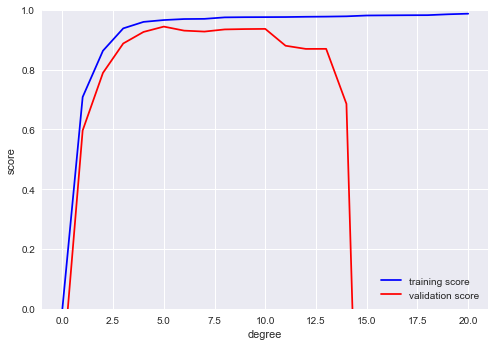

In [36]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

$R^2 = goodness~~ of~~ fittness = 1-FVU$, FVU=Fraction of variance unexplained

$R^2 = 1- \frac{\sum (y_i - \hat{y})}{\sum (y_i - \bar{y})^2}$

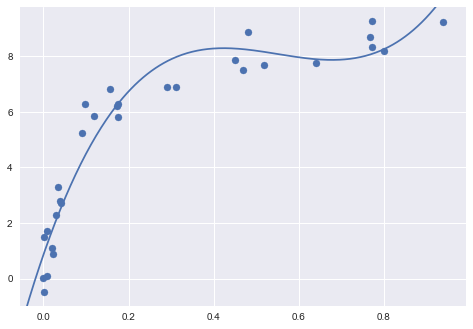

In [33]:
# from the above validation and training score, polynomial 3 seems to be appropriate

plt.style.use('seaborn')
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## Learning Curve
 -  A plot of the training/validation score with respect to the size of the training set is known as a learning curve.
   -  validation curve (or score) depends on two things: model complexity and training data points

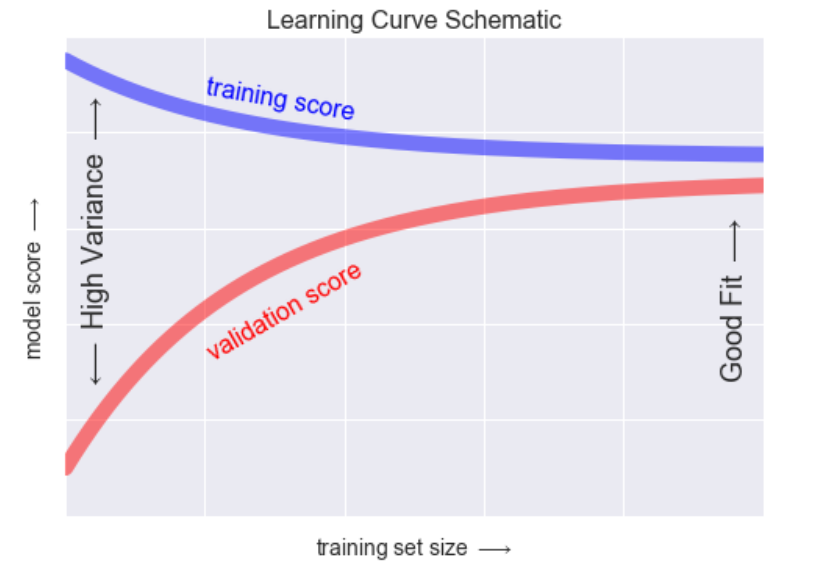

In [1]:
from IPython.display import Image
Image("c:/python/images/LearningCurve.PNG", width=500, height=360)

General behavior of learning curve given $a~~ model~~ complexity$:
- the model will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
-  the model will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
- A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

### Learning curve: Example

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y


X2, y2 = make_data(200)


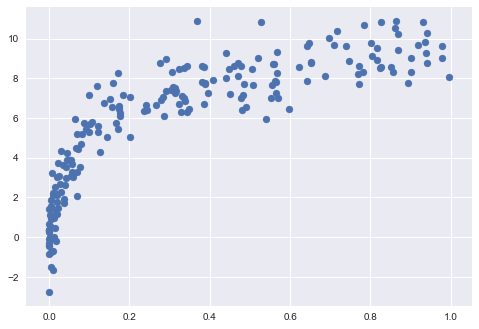

In [39]:
plt.scatter(X2.ravel(), y2);

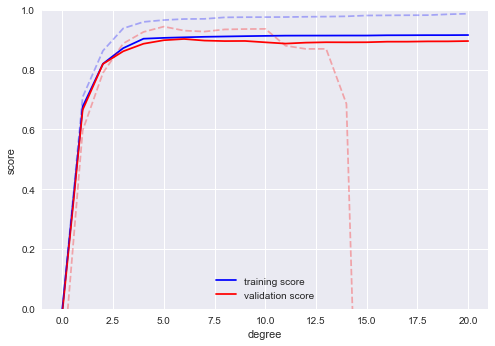

In [41]:
from sklearn.model_selection import validation_curve

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

- The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. 
  - the larger dataset can support a much more complicated model: 
  - the peak here is probably around a degree of 6, but even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close.

- the behavior of the validation curve has not one but two important inputs: 
   **the model complexity and the number of training points**
   
-  It is often useful to to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model.

- A plot of the training/validation score with respect to the size of the training set is known as a *learning curve.*

The general behavior we would expect from a learning curve is this:

- A model of a given complexity will *overfit* a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
- A model of a given complexity will *underfit* a large dataset: this means that the training score will decrease, but the validation score will increase.
- A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

### Learning curve in sklearn

In [56]:
N, train_lc, val_lc = learning_curve(PolynomialRegression(4),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 19))


In [58]:
train_lc 

array([[0.9740443 , 0.98292562, 0.97307124, 0.97307124, 0.97307124,
        0.97307124, 0.97307124],
       [0.97017994, 0.97927752, 0.96825695, 0.96825695, 0.96825695,
        0.96825695, 0.96825695],
       [0.9671545 , 0.95517622, 0.96722183, 0.96722183, 0.96722183,
        0.96722183, 0.96722183],
       [0.92841512, 0.92515091, 0.9280398 , 0.97203892, 0.97203892,
        0.97203892, 0.97203892],
       [0.92998066, 0.93372943, 0.93546754, 0.96084577, 0.96084577,
        0.96084577, 0.96084577],
       [0.93440797, 0.93885658, 0.94012608, 0.95985311, 0.95985311,
        0.95985311, 0.95985311],
       [0.91403439, 0.92589088, 0.91611187, 0.95647364, 0.95647364,
        0.95647364, 0.95647364],
       [0.91920676, 0.93064148, 0.9225788 , 0.96059532, 0.95846834,
        0.95846834, 0.95846834],
       [0.92403711, 0.93482515, 0.92874064, 0.96390711, 0.93103082,
        0.93103082, 0.93103082],
       [0.93616013, 0.94359229, 0.94058636, 0.96813125, 0.9400484 ,
        0.9400484 , 0.9

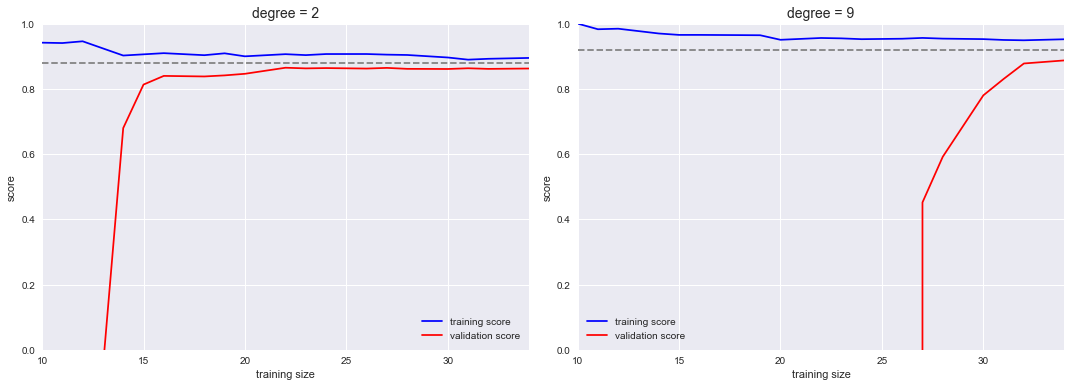

In [48]:
from sklearn.model_selection import learning_curve

X, y = make_data(40)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 19))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

- Q: Increase training data?
  - when your learning curve has already converged  adding more training data will not significantly improve the fit

- With the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). 

-  If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

## Validation in practice: Grid Search

**GridSearch:** optimized by cross-validated grid-search over a parameter grid. That is, providing optimal polynomial model 


- see http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [53]:
X, y = make_data(40)
grid.fit(X, y)
plt.style.use('seaborn')

In [54]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

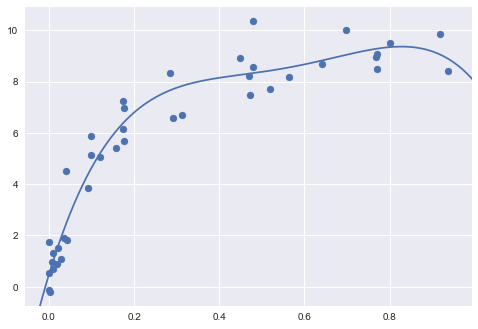

In [55]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
y_test = PolynomialRegression(4).fit(X, y).predict(X_test)

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);